# **Biodiversity Trends Over Time Using Python**

## Import Requred Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as pltl

## **Load dataset**

In [13]:

time_series_time_series_df = pd.read_csv("Datasets/biodiversity_dataset.csv")
time_series_df.head()

,EntryID,Ecosystem,Common Name,Scientific Name,Count,Year
0,10012797,Wetland,Knapweed,Senecio vulgaris,412,2012
1,10028051,Agricultural Field,Groundsel,Setaria faberi,242,2008
2,10065340,Grassland,Lambsquarters,Ambrosia artemisiifolia,179,2002
3,10003235,Agricultural Field,Bindweed,Setaria faberi,281,2005
4,10057117,Grassland,Clover,Cyperus esculentus,351,1995


## **Group by Year and Ecosystem to calculate Simpson Index**

In [14]:
def calculate_simpson_index(group):
    N = group["Count"].sum()
    return sum((n * (n - 1)) for n in group["Count"]) / (N * (N - 1)) if N > 1 else 0

biodiversity_trends = time_series_df.groupby(["Year", "Ecosystem"]).apply(calculate_simpson_index).reset_index(name="Simpson Index")
biodiversity_trends.head(10)

C:\Users\user\AppData\Local\Temp\ipykernel_7700\3172907065.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  biodiversity_trends = time_series_df.groupby(["Year", "Ecosystem"]).apply(calculate_simpson_index).reset_index(name="Simpson Index")


,Year,Ecosystem,Simpson Index
0,1990,Agricultural Field,0.132527
1,1990,Forest,1.000000
2,1990,Grassland,0.668368
3,1990,Urban,0.204758
4,1990,Wetland,0.208371
5,1991,Agricultural Field,0.500909
6,1991,Forest,0.171809
7,1991,Grassland,0.101013
8,1991,Urban,0.180138
9,1991,Wetland,0.151967


## **Plot trends for each ecosystem**

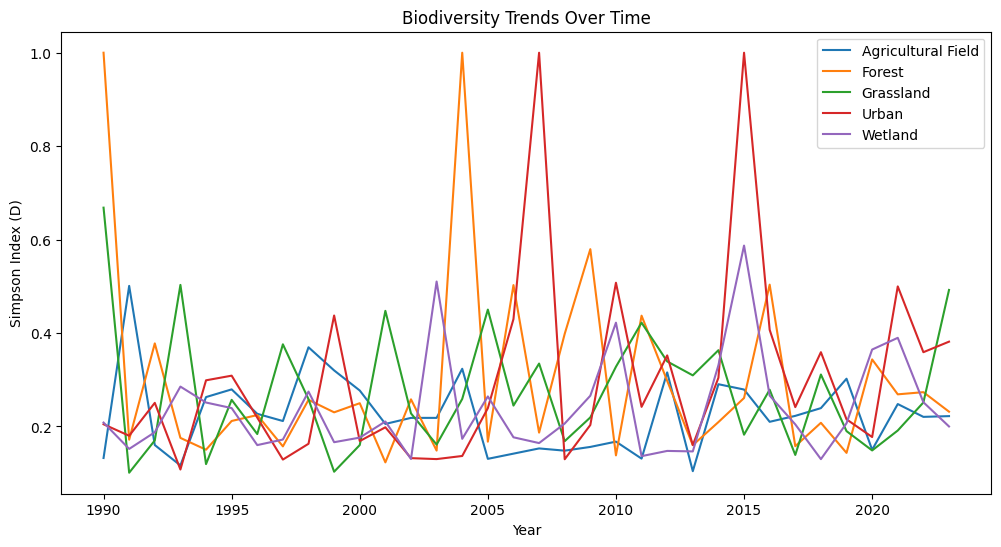

In [17]:
plt.figure(figsize=(12, 6))
for ecosystem in biodiversity_trends["Ecosystem"].unique():
    subset = biodiversity_trends[biodiversity_trends["Ecosystem"] == ecosystem]
    plt.plot(subset["Year"], subset["Simpson Index"], label=ecosystem)

plt.title("Biodiversity Trends Over Time")
plt.xlabel("Year")
plt.ylabel("Simpson Index (D)")
plt.legend()
plt.show()